# Select right threshold value using ROC Curve

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [4]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# RandomForest

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9821277777777777


# Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


# Adaboost Classifier

In [7]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Ada train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Ada test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Ada train roc-auc: 0.9975081174960356
Ada test roc-auc: 0.9826111111111111


# KNN Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

KNN train roc-auc: 0.981670071491109
KNN test roc-auc: 0.9426111111111111


### Focus on selecting best threshold for max accuracy

In [9]:
pred = []
for model in [rf_model, log_classifier, ada_classifier, knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
    
final_prediction = pd.concat(pred, axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test, final_prediction)))

Ensemble test roc-auc: 0.9849333333333334


In [10]:
pd.concat(pred, axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.99,0.966929,0.538202,0.8
3,0.96,0.761539,0.509875,0.8
4,0.54,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


# Calculate ROC Curve

In [11]:
fpr, tpr, threshold = roc_curve(y_test, final_prediction)

In [12]:
threshold

array([1.9134413 , 0.9134413 , 0.9010034 , 0.90077475, 0.80680157,
       0.80662833, 0.79380736, 0.7930558 , 0.78675879, 0.78571156,
       0.77047465, 0.77037124, 0.72925756, 0.72887362, 0.70451656,
       0.70143711, 0.66287883, 0.64493537, 0.60366701, 0.60175354,
       0.6015152 , 0.59864346, 0.58156376, 0.57736186, 0.55244674,
       0.55050386, 0.54542732, 0.54389283, 0.54355932, 0.48866892,
       0.45450602, 0.39591982, 0.39129719, 0.34062235, 0.33836612,
       0.24868663, 0.24140421, 0.19852808, 0.19848417, 0.11783548,
       0.1178351 , 0.10632697])

In [13]:
from sklearn.metrics import accuracy_score

accuracy_ls = []
for thres in threshold:
    y_pred = np.where(final_prediction>thres, 1, 0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(threshold), pd.Series(accuracy_ls)], axis=1)

accuracy_ls.columns = ['threshold', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace = True)
accuracy_ls.head()

,threshold,accuracy
30,0.454506,0.961667
27,0.543893,0.961667
28,0.543559,0.960000
26,0.545427,0.960000
29,0.488669,0.958333


In [14]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label = 'ROC')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

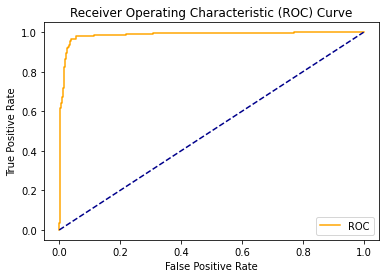

In [15]:
plot_roc_curve(fpr, tpr)